In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
%matplotlib inline
plt.style.use('ggplot')

In [2]:
columns = ['user_id' ,'order_id','order_products','order_amount']

In [6]:
df = pd.read_table("D:/GitHub/Machine-Learning/project/CDNOW_master.txt",names = columns,sep = "\s+")

In [8]:
df.head()

,user_id,order_id,order_products,order_amount
0,1,19970101,1,11.77
1,2,19970112,1,12.00
2,2,19970112,5,77.00
3,3,19970102,2,20.76
4,3,19970330,2,20.76


In [9]:
df.describe()

,user_id,order_id,order_products,order_amount
count,69659.000000,6.965900e+04,69659.000000,69659.000000
mean,11470.854592,1.997228e+07,2.410040,35.893648
std,6819.904848,3.837735e+03,2.333924,36.281942
min,1.000000,1.997010e+07,1.000000,0.000000
25%,5506.000000,1.997022e+07,1.000000,14.490000
50%,11410.000000,1.997042e+07,2.000000,25.980000
75%,17273.000000,1.997111e+07,3.000000,43.700000
max,23570.000000,1.998063e+07,99.000000,1286.010000


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69659 entries, 0 to 69658
Data columns (total 4 columns):
user_id           69659 non-null int64
order_id          69659 non-null int64
order_products    69659 non-null int64
order_amount      69659 non-null float64
dtypes: float64(1), int64(3)
memory usage: 2.1 MB


In [14]:
df["order_date"] = pd.to_datetime(df["order_id"],format="%Y%m%d")

In [19]:
df["month"] = df.order_date.values.astype('datetime64[M]')

In [23]:
# df["month2"] = pd.tseries.offsets.MonthBegin(1)

In [24]:
df.head()

,user_id,order_id,order_products,order_amount,order_date,month,month2
0,1,19970101,1,11.77,1997-01-01,1997-01-01,<MonthBegin>
1,2,19970112,1,12.00,1997-01-12,1997-01-01,<MonthBegin>
2,2,19970112,5,77.00,1997-01-12,1997-01-01,<MonthBegin>
3,3,19970102,2,20.76,1997-01-02,1997-01-01,<MonthBegin>
4,3,19970330,2,20.76,1997-03-30,1997-03-01,<MonthBegin>


#### 上述描述都是针对于订单，现在来看基于用户的

In [25]:
user_grouped = df.groupby('user_id').sum()

In [26]:
user_grouped.head()

,order_id,order_products,order_amount
user_id,,,
1,19970101,1,11.77
2,39940224,6,89.00
3,119833602,16,156.46
4,79882233,7,100.50
5,219686137,29,385.61


In [27]:
user_grouped.describe()

,order_id,order_products,order_amount
count,2.357000e+04,23570.000000,23570.000000
mean,5.902627e+07,7.122656,106.080426
std,9.460684e+07,16.983531,240.925195
min,1.997010e+07,1.000000,0.000000
25%,1.997021e+07,1.000000,19.970000
50%,1.997032e+07,3.000000,43.395000
75%,5.992125e+07,7.000000,106.475000
max,4.334408e+09,1033.000000,13990.930000


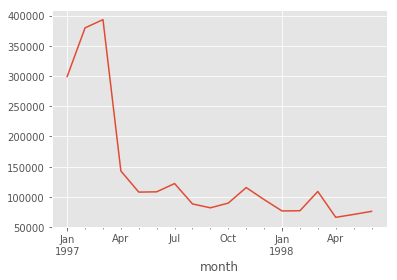

In [29]:
df.groupby('month').order_amount.sum().plot()

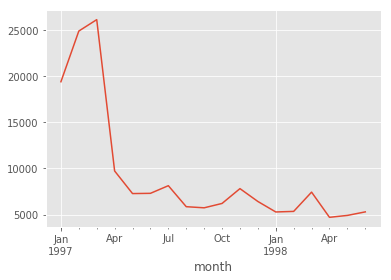

In [30]:
df.groupby('month').order_products.sum().plot()

### 以上情况两种可能：1月有异常值，或有促销

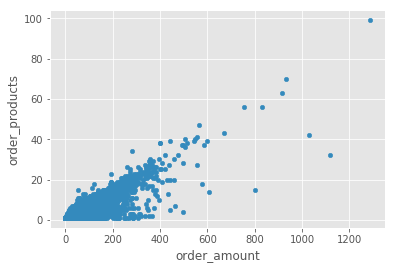

In [31]:
df.plot.scatter(x = "order_amount" , y = "order_products")

### 订单消费金额和订单商品量呈规律性，每个商品十元左右。订单的极值较少，超出1000的就几个。显然不是异常波动的罪魁祸首。